In [99]:
from __future__ import print_function
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

df = pd.read_csv('Data.csv')
#divide into train and test dataframe
train_df = df.sample(frac=0.8)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
test_type = test_df['Activities_Types']
train_y = pd.get_dummies(train_df['Activities_Types'])
test_y = pd.get_dummies(test_df['Activities_Types'])
train_df = train_df.drop(columns=['index', 'Activities_Types'])
test_df = test_df.drop(columns=['index', 'Activities_Types'])

#normalize
train_df = (train_df-train_df.mean())/train_df.std()
test_df = (test_df-test_df.mean())/test_df.std()
train_x = train_df.values
test_x = test_df.values
train_y =train_y.values
test_y =test_y.values

#read hidden test data
hidden_df = pd.read_csv('Test_no_Ac.csv')

# Parameters
learning_rate = 0.01
num_steps = 150
batch_size = 1500
display_step = 10
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 68
num_classes = 6



X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

weights = {
	'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
	'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
	'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
	'b1': tf.Variable(tf.random_normal([n_hidden_1])),
	'b2': tf.Variable(tf.random_normal([n_hidden_2])),
	'out': tf.Variable(tf.random_normal([num_classes]))
}

In [100]:

def get_Batch(data, label, batch_size):
    input_queue = tf.train.slice_input_producer([data, label], capacity=64, shuffle=True) 
    x_batch, y_batch = tf.train.batch(input_queue, batch_size=batch_size, num_threads=1, capacity=64, allow_smaller_final_batch=True)
    return x_batch, y_batch

# Create model
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
gd_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op_gd = gd_optimizer.minimize(loss_op)
ada_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
train_op_ada = ada_optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
x_batch, y_batch = get_Batch(train_x, train_y, batch_size)


lossArray = np.array([])
lossValidateArr = np.array([])
accArray = np.array([])
accValidateArr = np.array([])

def countFactor(predict, actual, classType):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(len(predict)):
        preType = np.argmax(predict[i])+1
        actType = np.argmax(actual[i])+1
        if preType == classType and actType == classType:
            TP += 1
        elif preType != classType and (preType==actType):
            TN += 1
        elif preType == classType and actType!=classType:
            FP += 1
        elif preType != classType and (preType!=actType):
            FN += 1
    return TP,TN,FP,FN

def countMetric(TP, TN, FP, FN):
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f_score = 2*(precision*recall)/(precision+recall)
    return precision, recall, f_score

def countMacAvg(p1,p2,p3,p4,p5,p6,r1,r2,r3,r4,r5,r6,f1,f2,f3,f4,f5,f6):
    macP = (p1+p2+p3+p4+p5+p6)/6
    macR = (r1+r2+r3+r4+r5+r6)/6
    macF = 2*(macP*macR)/(macP+macR)
    return macP,macR,macF

def countMicAvg(TP1,TP2,TP3,TP4,TP5,TP6,FP1,FP2,FP3,FP4,FP5,FP6,FN1,FN2,FN3,FN4,FN5,FN6):
    TP_avg = (TP1+TP2+TP3+TP4+TP5+TP6)/6
    FP_avg = (FP1+FP2+FP3+FP4+FP5+FP6)/6
    FN_avg = (FN1+FN2+FN3+FN4+FN5+FN6)/6
    micP = TP_avg/(TP_avg+FP_avg)
    micR = TP_avg/(TP_avg+FN_avg)
    micF = 2*(micP*micR)/(micP+micR)
    return micP,micR,micF

Adam Optimizer start
Step 1, Minibatch Loss= 815.7585, Training Accuracy= 0.499
Step 10, Minibatch Loss= 124.1957, Training Accuracy= 0.903
Step 20, Minibatch Loss= 90.7055, Training Accuracy= 0.943
Step 30, Minibatch Loss= 55.6230, Training Accuracy= 0.958
Step 40, Minibatch Loss= 30.2910, Training Accuracy= 0.968
Step 50, Minibatch Loss= 21.5492, Training Accuracy= 0.963
Step 60, Minibatch Loss= 17.7735, Training Accuracy= 0.971
Step 70, Minibatch Loss= 10.4288, Training Accuracy= 0.969
Step 80, Minibatch Loss= 9.3758, Training Accuracy= 0.968
Step 90, Minibatch Loss= 8.3579, Training Accuracy= 0.965
Step 100, Minibatch Loss= 7.7701, Training Accuracy= 0.975
Step 110, Minibatch Loss= 11.2588, Training Accuracy= 0.971
Step 120, Minibatch Loss= 4.8798, Training Accuracy= 0.968
Step 130, Minibatch Loss= 3.5118, Training Accuracy= 0.969
Step 140, Minibatch Loss= 4.2185, Training Accuracy= 0.967
Step 150, Minibatch Loss= 4.6067, Training Accuracy= 0.973
Optimization Finished!


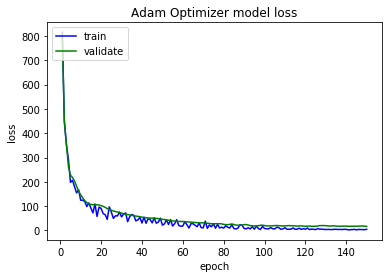

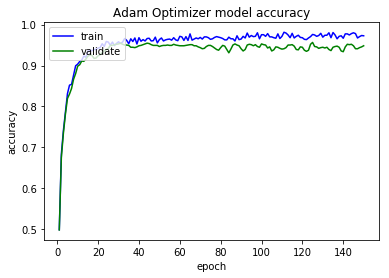

Testing Accuracy: 0.94827586
Hidden test answer have been writen.
Class 1
precision:  0.862 recall: 0.648 f-score: 0.740
Class 2
precision:  0.987 recall: 0.807 f-score: 0.888
Class 3
precision:  0.984 recall: 0.735 f-score: 0.841
Class 4
precision:  0.763 recall: 0.744 f-score: 0.753
Class 5
precision:  0.964 recall: 0.851 f-score: 0.904
Class 6
precision:  0.992 recall: 0.826 f-score: 0.902
macro precision:  0.925
macro recall:  0.768
macro f-score:  0.840
micro precision:  0.948
micro recall 0.786
micro f-scroe 0.859


In [101]:
# Start training
with tf.Session() as sess:
# Run the initializer
    print('Adam Optimizer start')
    sess.run(init)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess, coord)
    for step in range(1, num_steps+1):
        if coord.should_stop():
            break
        batch_x, batch_y = sess.run([x_batch, y_batch])
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
        lossArray = np.append(lossArray, loss)
        accArray = np.append(accArray, acc)
        
        lossValid, accValidate = sess.run([loss_op, accuracy], feed_dict={X: test_x, Y: test_y})
        lossValidateArr = np.append(lossValidateArr, lossValid)
        accValidateArr = np.append(accValidateArr, accValidate)
        if step % display_step == 0 or step == 1:
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    coord.request_stop()
    coord.join(threads)
    print("Optimization Finished!")

    plt.plot(range(1, num_steps+1), lossArray, "b", label="train")
    plt.plot(range(1, num_steps+1), lossValidateArr, "g", label="validate")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Adam Optimizer model loss")
    plt.legend(loc = 2)
    plt.show()
    
    plt.plot(range(1, num_steps+1), accArray, "b", label="train")
    plt.plot(range(1, num_steps+1), accValidateArr, "g", label="validate")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Adam Optimizer model accuracy")
    plt.legend(loc = 2)
    plt.show()
    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: test_x,Y: test_y}))
    predictRes = sess.run(prediction, feed_dict={X: test_x,Y: test_y})
    
    hidden_predict_onehot = sess.run(prediction, feed_dict={X: hidden_df.values})
    hidden_predict = np.argmax(hidden_predict_onehot, axis=1)+1
    f = open("107062650_answer.txt", "w")
    for index, item in enumerate(hidden_predict):
        f.write(str(index+1)+'\t')
        f.write(str(item))
        f.write('\n')
    f.close()
    print('Hidden test answer have been writen.')
    
    TP1, TN1, FP1, FN1 = countFactor(predictRes, test_y, 1)
    TP2, TN2, FP2, FN2 = countFactor(predictRes, test_y, 2)
    TP3, TN3, FP3, FN3 = countFactor(predictRes, test_y, 3)
    TP4, TN4, FP4, FN4 = countFactor(predictRes, test_y, 4)
    TP5, TN5, FP5, FN5 = countFactor(predictRes, test_y, 5)
    TP6, TN6, FP6, FN6 = countFactor(predictRes, test_y, 6)
    precision1, recall1, f_score1 = countMetric(TP1,TN1,FP1,FN1)
    precision2, recall2, f_score2 = countMetric(TP2,TN2,FP2,FN2)
    precision3, recall3, f_score3 = countMetric(TP3,TN3,FP3,FN1)
    precision4, recall4, f_score4 = countMetric(TP4,TN4,FP4,FN4)
    precision5, recall5, f_score5 = countMetric(TP5,TN5,FP5,FN5)
    precision6, recall6, f_score6 = countMetric(TP6,TN6,FP6,FN6)
    print('Class 1')
    print('precision: ',format(precision1, '0.3f'),'recall:',format(recall1, '0.3f'),'f-score:',format(f_score1,'0.3f'))
    print('Class 2')
    print('precision: ',format(precision2, '0.3f'),'recall:',format(recall2, '0.3f'),'f-score:',format(f_score2,'0.3f'))
    print('Class 3')
    print('precision: ',format(precision3, '0.3f'),'recall:',format(recall3, '0.3f'),'f-score:',format(f_score3,'0.3f'))
    print('Class 4')
    print('precision: ',format(precision4, '0.3f'),'recall:',format(recall4, '0.3f'),'f-score:',format(f_score4,'0.3f'))
    print('Class 5')
    print('precision: ',format(precision5, '0.3f'),'recall:',format(recall5, '0.3f'),'f-score:',format(f_score5,'0.3f'))
    print('Class 6')
    print('precision: ',format(precision6, '0.3f'),'recall:',format(recall6, '0.3f'),'f-score:',format(f_score6,'0.3f'))
    macP, macR, macF = countMacAvg(precision1, precision2, precision3, precision4, precision5, precision6, \
                                                        recall1, recall2, recall3, recall4, recall5, recall6,\
                                                        f_score1, f_score2, f_score3, f_score4, f_score5, f_score6)
    print('macro precision: ', format(macP, '0.3f'))
    print('macro recall: ', format(macR, '0.3f'))
    print('macro f-score: ', format(macF, '0.3f'))
    
    micP, micR, micF = countMicAvg(TP1,TP2,TP3,TP4,TP5,TP6,FP1,FP2,FP3,FP4,FP5,FP6,FN1,FN2,FN3,FN4,FN5,FN6)
    print('micro precision: ', format(micP, '0.3f'))
    print('micro recall', format(micR, '0.3f'))
    print('micro f-scroe', format(micF, '0.3f'))


Gradient Descent Optimizer start
Step 1, Minibatch Loss= 2127.1929, Training Accuracy= 0.589
Step 10, Minibatch Loss= 74.7339, Training Accuracy= 0.939
Step 20, Minibatch Loss= 44.2047, Training Accuracy= 0.959
Step 30, Minibatch Loss= 37.6674, Training Accuracy= 0.956
Step 40, Minibatch Loss= 46.5174, Training Accuracy= 0.960
Step 50, Minibatch Loss= 17.1376, Training Accuracy= 0.954
Step 60, Minibatch Loss= 15.9458, Training Accuracy= 0.968
Step 70, Minibatch Loss= 10.7349, Training Accuracy= 0.974
Step 80, Minibatch Loss= 9.7558, Training Accuracy= 0.970
Step 90, Minibatch Loss= 12.4154, Training Accuracy= 0.969
Step 100, Minibatch Loss= 13.4725, Training Accuracy= 0.963
Step 110, Minibatch Loss= 13.9458, Training Accuracy= 0.965
Step 120, Minibatch Loss= 68.3201, Training Accuracy= 0.907
Step 130, Minibatch Loss= 10.0755, Training Accuracy= 0.973
Step 140, Minibatch Loss= 14.0125, Training Accuracy= 0.967
Step 150, Minibatch Loss= 6.8217, Training Accuracy= 0.970
Optimization Fini

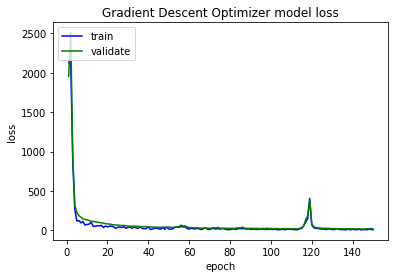

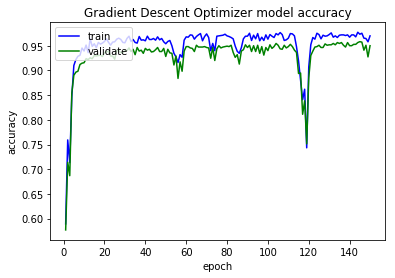

Testing Accuracy: 0.95009077
Class 1
precision:  0.891 recall: 0.646 f-score: 0.749
Class 2
precision:  0.974 recall: 0.822 f-score: 0.892
Class 3
precision:  0.983 recall: 0.726 f-score: 0.835
Class 4
precision:  0.812 recall: 0.695 f-score: 0.749
Class 5
precision:  0.939 recall: 0.883 f-score: 0.910
Class 6
precision:  1.000 recall: 0.825 f-score: 0.904
macro precision:  0.933
macro recall:  0.766
macro f-score:  0.841
micro precision:  0.950
micro recall 0.792
micro f-scroe 0.864


In [102]:
with tf.Session() as sess:
    #try gradient descent optimizer
    lossArray = np.array([])
    lossValidateArr = np.array([])
    accArray = np.array([])
    accValidateArr = np.array([])
    print('\nGradient Descent Optimizer start')
    sess.run(init)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess, coord)
    for step in range(1, num_steps+1):
        if coord.should_stop():
            break
        batch_x, batch_y = sess.run([x_batch, y_batch])
        # Run optimization op (backprop)
        sess.run(train_op_gd, feed_dict={X: batch_x, Y: batch_y})
        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
        lossArray = np.append(lossArray, loss)
        accArray = np.append(accArray, acc)
        
        lossValid, accValidate = sess.run([loss_op, accuracy], feed_dict={X: test_x, Y: test_y})
        lossValidateArr = np.append(lossValidateArr, lossValid)
        accValidateArr = np.append(accValidateArr, accValidate)
        if step % display_step == 0 or step == 1:
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    coord.request_stop()
    coord.join(threads)
    print("Optimization Finished!")

    plt.plot(range(1, num_steps+1), lossArray, "b", label="train")
    plt.plot(range(1, num_steps+1), lossValidateArr, "g", label="validate")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Gradient Descent Optimizer model loss")
    plt.legend(loc = 2)
    plt.show()
    
    plt.plot(range(1, num_steps+1), accArray, "b", label="train")
    plt.plot(range(1, num_steps+1), accValidateArr, "g", label="validate")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Gradient Descent Optimizer model accuracy")
    plt.legend(loc = 2)
    plt.show()
    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: test_x,Y: test_y}))
    predictRes = sess.run(prediction, feed_dict={X: test_x,Y: test_y})
    
    TP1, TN1, FP1, FN1 = countFactor(predictRes, test_y, 1)
    TP2, TN2, FP2, FN2 = countFactor(predictRes, test_y, 2)
    TP3, TN3, FP3, FN3 = countFactor(predictRes, test_y, 3)
    TP4, TN4, FP4, FN4 = countFactor(predictRes, test_y, 4)
    TP5, TN5, FP5, FN5 = countFactor(predictRes, test_y, 5)
    TP6, TN6, FP6, FN6 = countFactor(predictRes, test_y, 6)
    precision1, recall1, f_score1 = countMetric(TP1,TN1,FP1,FN1)
    precision2, recall2, f_score2 = countMetric(TP2,TN2,FP2,FN2)
    precision3, recall3, f_score3 = countMetric(TP3,TN3,FP3,FN1)
    precision4, recall4, f_score4 = countMetric(TP4,TN4,FP4,FN4)
    precision5, recall5, f_score5 = countMetric(TP5,TN5,FP5,FN5)
    precision6, recall6, f_score6 = countMetric(TP6,TN6,FP6,FN6)
    print('Class 1')
    print('precision: ',format(precision1, '0.3f'),'recall:',format(recall1, '0.3f'),'f-score:',format(f_score1,'0.3f'))
    print('Class 2')
    print('precision: ',format(precision2, '0.3f'),'recall:',format(recall2, '0.3f'),'f-score:',format(f_score2,'0.3f'))
    print('Class 3')
    print('precision: ',format(precision3, '0.3f'),'recall:',format(recall3, '0.3f'),'f-score:',format(f_score3,'0.3f'))
    print('Class 4')
    print('precision: ',format(precision4, '0.3f'),'recall:',format(recall4, '0.3f'),'f-score:',format(f_score4,'0.3f'))
    print('Class 5')
    print('precision: ',format(precision5, '0.3f'),'recall:',format(recall5, '0.3f'),'f-score:',format(f_score5,'0.3f'))
    print('Class 6')
    print('precision: ',format(precision6, '0.3f'),'recall:',format(recall6, '0.3f'),'f-score:',format(f_score6,'0.3f'))
    macP, macR, macF = countMacAvg(precision1, precision2, precision3, precision4, precision5, precision6, \
                                                        recall1, recall2, recall3, recall4, recall5, recall6,\
                                                        f_score1, f_score2, f_score3, f_score4, f_score5, f_score6)
    print('macro precision: ', format(macP, '0.3f'))
    print('macro recall: ', format(macR, '0.3f'))
    print('macro f-score: ', format(macF, '0.3f'))
    
    micP, micR, micF = countMicAvg(TP1,TP2,TP3,TP4,TP5,TP6,FP1,FP2,FP3,FP4,FP5,FP6,FN1,FN2,FN3,FN4,FN5,FN6)
    print('micro precision: ', format(micP, '0.3f'))
    print('micro recall', format(micR, '0.3f'))
    print('micro f-scroe', format(micF, '0.3f'))


Ada-grad Optimizer start
Step 1, Minibatch Loss= 1000.0541, Training Accuracy= 0.474
Step 10, Minibatch Loss= 199.6039, Training Accuracy= 0.797
Step 20, Minibatch Loss= 97.3798, Training Accuracy= 0.875
Step 30, Minibatch Loss= 73.9579, Training Accuracy= 0.887
Step 40, Minibatch Loss= 41.8197, Training Accuracy= 0.919
Step 50, Minibatch Loss= 28.9931, Training Accuracy= 0.935
Step 60, Minibatch Loss= 38.3981, Training Accuracy= 0.925
Step 70, Minibatch Loss= 28.1582, Training Accuracy= 0.941
Step 80, Minibatch Loss= 15.5096, Training Accuracy= 0.953
Step 90, Minibatch Loss= 24.1603, Training Accuracy= 0.948
Step 100, Minibatch Loss= 25.5107, Training Accuracy= 0.951
Step 110, Minibatch Loss= 19.9208, Training Accuracy= 0.946
Step 120, Minibatch Loss= 14.6154, Training Accuracy= 0.952
Step 130, Minibatch Loss= 15.0393, Training Accuracy= 0.957
Step 140, Minibatch Loss= 12.4783, Training Accuracy= 0.956
Step 150, Minibatch Loss= 16.2204, Training Accuracy= 0.957
Optimization Finished!

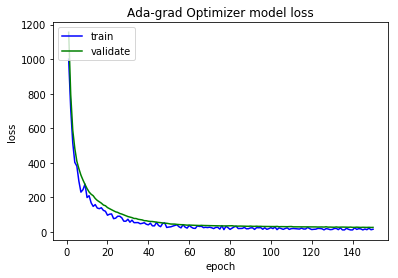

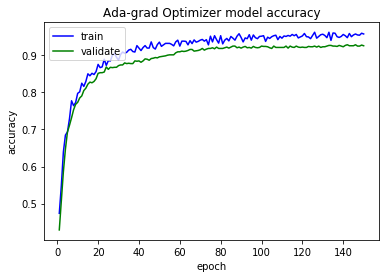

Testing Accuracy: 0.92558986
Class 1
precision:  0.871 recall: 0.536 f-score: 0.664
Class 2
precision:  0.982 recall: 0.741 f-score: 0.845
Class 3
precision:  0.992 recall: 0.630 f-score: 0.770
Class 4
precision:  0.692 recall: 0.648 f-score: 0.669
Class 5
precision:  0.920 recall: 0.808 f-score: 0.861
Class 6
precision:  0.978 recall: 0.774 f-score: 0.864
macro precision:  0.906
macro recall:  0.690
macro f-score:  0.783
micro precision:  0.926
micro recall 0.713
micro f-scroe 0.806


In [103]:
with tf.Session() as sess:
    #try gradient descent optimizer
    lossArray = np.array([])
    lossValidateArr = np.array([])
    accArray = np.array([])
    accValidateArr = np.array([])
    print('\nAda-grad Optimizer start')
    sess.run(init)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess, coord)
    for step in range(1, num_steps+1):
        if coord.should_stop():
            break
        batch_x, batch_y = sess.run([x_batch, y_batch])
        # Run optimization op (backprop)
        sess.run(train_op_ada, feed_dict={X: batch_x, Y: batch_y})
        loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
        lossArray = np.append(lossArray, loss)
        accArray = np.append(accArray, acc)
        
        lossValid, accValidate = sess.run([loss_op, accuracy], feed_dict={X: test_x, Y: test_y})
        lossValidateArr = np.append(lossValidateArr, lossValid)
        accValidateArr = np.append(accValidateArr, accValidate)
        if step % display_step == 0 or step == 1:
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    coord.request_stop()
    coord.join(threads)
    print("Optimization Finished!")

    plt.plot(range(1, num_steps+1), lossArray, "b", label="train")
    plt.plot(range(1, num_steps+1), lossValidateArr, "g", label="validate")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Ada-grad Optimizer model loss")
    plt.legend(loc = 2)
    plt.show()
    
    plt.plot(range(1, num_steps+1), accArray, "b", label="train")
    plt.plot(range(1, num_steps+1), accValidateArr, "g", label="validate")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Ada-grad Optimizer model accuracy")
    plt.legend(loc = 2)
    plt.show()
    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: test_x,Y: test_y}))
    predictRes = sess.run(prediction, feed_dict={X: test_x,Y: test_y})
    
    TP1, TN1, FP1, FN1 = countFactor(predictRes, test_y, 1)
    TP2, TN2, FP2, FN2 = countFactor(predictRes, test_y, 2)
    TP3, TN3, FP3, FN3 = countFactor(predictRes, test_y, 3)
    TP4, TN4, FP4, FN4 = countFactor(predictRes, test_y, 4)
    TP5, TN5, FP5, FN5 = countFactor(predictRes, test_y, 5)
    TP6, TN6, FP6, FN6 = countFactor(predictRes, test_y, 6)
    precision1, recall1, f_score1 = countMetric(TP1,TN1,FP1,FN1)
    precision2, recall2, f_score2 = countMetric(TP2,TN2,FP2,FN2)
    precision3, recall3, f_score3 = countMetric(TP3,TN3,FP3,FN1)
    precision4, recall4, f_score4 = countMetric(TP4,TN4,FP4,FN4)
    precision5, recall5, f_score5 = countMetric(TP5,TN5,FP5,FN5)
    precision6, recall6, f_score6 = countMetric(TP6,TN6,FP6,FN6)
    print('Class 1')
    print('precision: ',format(precision1, '0.3f'),'recall:',format(recall1, '0.3f'),'f-score:',format(f_score1,'0.3f'))
    print('Class 2')
    print('precision: ',format(precision2, '0.3f'),'recall:',format(recall2, '0.3f'),'f-score:',format(f_score2,'0.3f'))
    print('Class 3')
    print('precision: ',format(precision3, '0.3f'),'recall:',format(recall3, '0.3f'),'f-score:',format(f_score3,'0.3f'))
    print('Class 4')
    print('precision: ',format(precision4, '0.3f'),'recall:',format(recall4, '0.3f'),'f-score:',format(f_score4,'0.3f'))
    print('Class 5')
    print('precision: ',format(precision5, '0.3f'),'recall:',format(recall5, '0.3f'),'f-score:',format(f_score5,'0.3f'))
    print('Class 6')
    print('precision: ',format(precision6, '0.3f'),'recall:',format(recall6, '0.3f'),'f-score:',format(f_score6,'0.3f'))
    macP, macR, macF = countMacAvg(precision1, precision2, precision3, precision4, precision5, precision6, \
                                                        recall1, recall2, recall3, recall4, recall5, recall6,\
                                                        f_score1, f_score2, f_score3, f_score4, f_score5, f_score6)
    print('macro precision: ', format(macP, '0.3f'))
    print('macro recall: ', format(macR, '0.3f'))
    print('macro f-score: ', format(macF, '0.3f'))
    
    micP, micR, micF = countMicAvg(TP1,TP2,TP3,TP4,TP5,TP6,FP1,FP2,FP3,FP4,FP5,FP6,FN1,FN2,FN3,FN4,FN5,FN6)
    print('micro precision: ', format(micP, '0.3f'))
    print('micro recall', format(micR, '0.3f'))
    print('micro f-scroe', format(micF, '0.3f'))

## PCA figure

In [104]:
sc = StandardScaler()
Z = sc.fit_transform(test_df)
R = np.dot(Z.T, Z) / df.shape[0]
eigen_vals, eigen_vecs = np.linalg.eigh(R)

#print('\nEigenvalues: \n%s' % eigen_vals)

In [105]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
#print('Projection matrix W:\n', W)

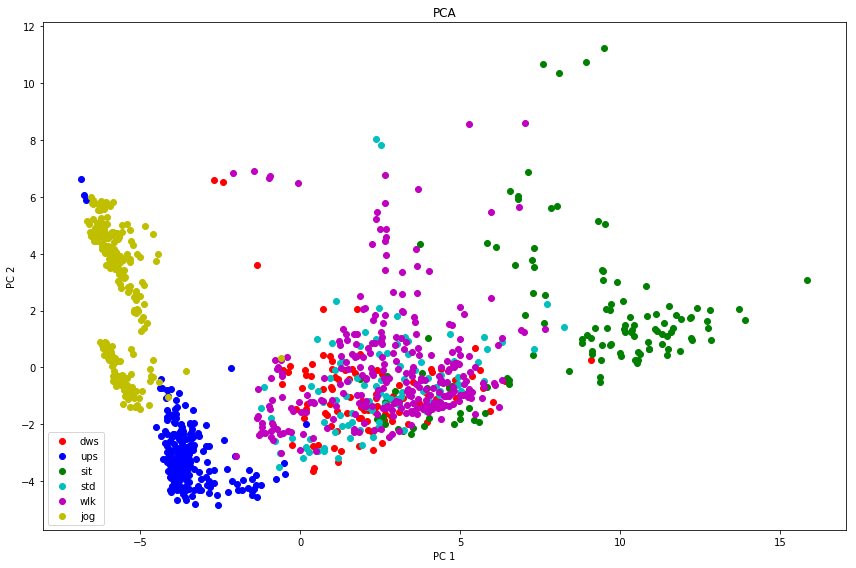

In [106]:
Z_pca = Z.dot(W)

plt.figure(figsize=(12,8))
colors = ['r', 'b', 'g','c','m','y']
markers = ['o', 'o', 'o', 'o', 'o', 'o']
labels = ['dws','ups','sit','std','wlk','jog']
for l, c, lb, m in zip(np.unique(test_type.values), colors, labels, markers):
    plt.scatter(Z_pca[test_type.values==l, 0], 
                Z_pca[test_type.values==l, 1], 
                c=c, label=lb, marker=m)

plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## t-SNE figure

In [107]:
tsne2 = TSNE(n_components=2, random_state=0)
tsne2_result = tsne2.fit_transform(test_df)

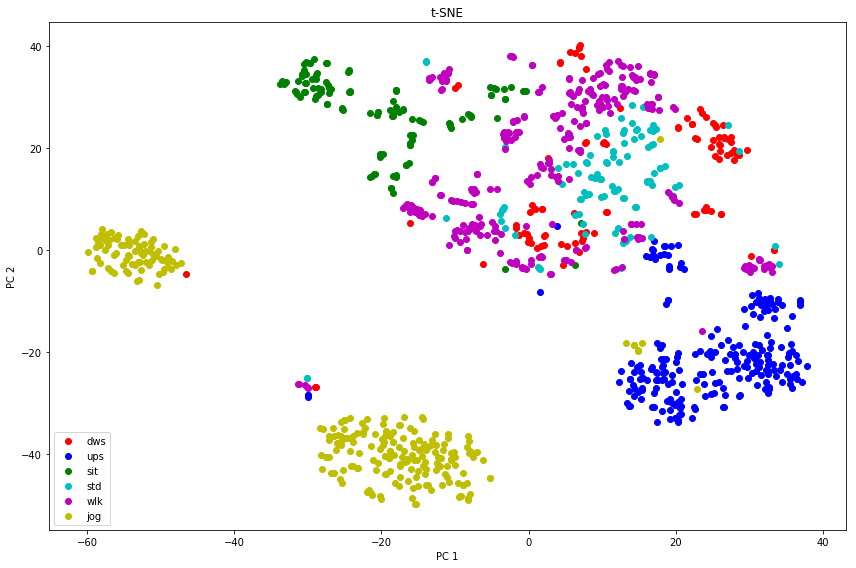

In [108]:
plt.figure(figsize=(12,8))
colors = ['r', 'b', 'g','c','m','y']
markers = ['o', 'o', 'o', 'o', 'o', 'o']
labels = ['dws','ups','sit','std','wlk','jog']
for l, c, lb, m in zip(np.unique(test_type.values), colors, labels, markers):
    plt.scatter(tsne2_result[test_type.values==l, 0], 
                tsne2_result[test_type.values==l, 1], 
                c=c, label=lb, marker=m)

plt.title('t-SNE')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()